In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/credit_risk_dataset_cleaned.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28627,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28628,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28629,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28630,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Analysis


# Objective : 

The main purpose of this data analysis is to check the effect of each attributes on the label 'loan status'. And also to find out what are all the factors which affect the loan status.

For this purpose we will be doing Univariate as well as Multivariate Analysis on the attributes.

# person_age

<AxesSubplot:>

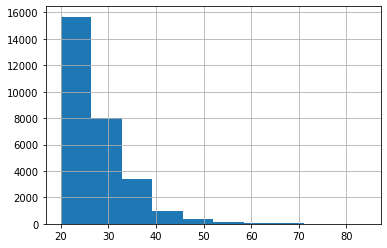

In [3]:
df["person_age"].hist()

According to the above graph, we can see that the histogram is right skewed. Most of the data lies in the age range of 20 to 35.

In [4]:
person_counts_for_age_less_than_35 = df[(df["person_age"]<35)]["person_age"].value_counts().sum()
person_counts_for_age_between_35_50 = df[(df["person_age"]>=35) & (df["person_age"]<50)]["person_age"].value_counts().sum()
person_counts_for_age_greater_than_50 = df[df["person_age"]>=50]["person_age"].value_counts().sum()

<BarContainer object of 3 artists>

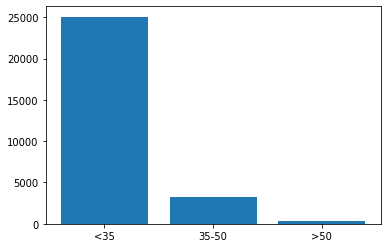

In [5]:
age_categories = {
    '<35' : person_counts_for_age_less_than_35,
    '35-50' : person_counts_for_age_between_35_50,
    '>50' : person_counts_for_age_greater_than_50
    
}
x = list(age_categories.keys())
y = list(age_categories.values())
plt.bar(x = x, height = y)

We can clearly see from the above bar graphs that majority of the loans have been taken by the younger generation people who have age <35, whereas the relatively older people donot have a major share in getting a loan. This is because younger people tend to have a higher risk taking ability.

[87.52794076557697, 11.445236099469126, 1.0268231349538977]


([<matplotlib.patches.Wedge at 0x260eca71d60>,
 [Text(-0.4200596790931397, -1.016636545674101, '<35'),
  Text(0.45263084640861095, 1.0025593832184827, '35-50'),
  Text(0.035478578168597015, 1.0994277013479035, '>50')])

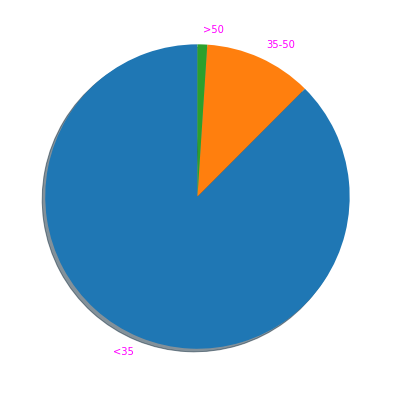

In [6]:
age_categories = {
    '<35' : 100*person_counts_for_age_less_than_35/df.shape[0],
    '35-50' : 100*person_counts_for_age_between_35_50/df.shape[0],
    '>50' : 100*person_counts_for_age_greater_than_50/df.shape[0]
    
}
print(list(age_categories.values()))
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(list(age_categories.values()),labels = list(age_categories.keys()),shadow = True,startangle = 90,textprops = dict(color ="magenta"))

As we can see clearly that people <35 years of age takes 87.5% (clear majority) of the pie chart area.

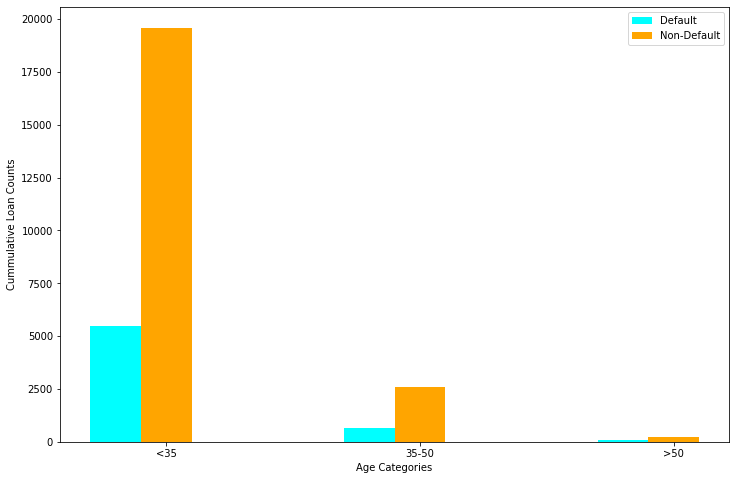

In [43]:
default = [df[df["person_age"]<35]["loan_status"].value_counts()[1], 
           df[(df["person_age"]>=35) & (df["person_age"]<50)]["loan_status"].value_counts()[1],
           df[df["person_age"]>=50]["loan_status"].value_counts()[1]]


non_default = [df[df["person_age"]<35]["loan_status"].value_counts()[0],
              df[(df["person_age"]>=35) & (df["person_age"]<50)]["loan_status"].value_counts()[0],
              df[df["person_age"]>=50]["loan_status"].value_counts()[0]]

x = np.arange(3)
plt.figure(figsize=(12,8))
plt.bar(x-0.2, height=default,width=0.2, color='cyan')
plt.bar(x, height=non_default,width=0.2, color='orange')
plt.xticks(x,['<35','35-50','>50'])
plt.xlabel("Age Categories")
plt.ylabel("Cummulative Loan Counts")
plt.legend(["Default", "Non-Default"])
plt.show()

In the Bar Chart above we can see that for the people with age <35 years, the number of defaults is the most. But it cannot be concluded that people of age group <35 years are majority as we dont have much data for the other categories. Therefore we will try to find out the relative percentage of defaulters vs non-defaulters for each category.

dict_values([33.115809623248936, 14.34918648310388, 8.886971527178602])


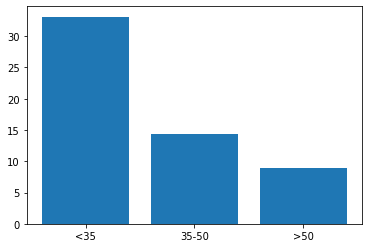

In [66]:
relative_default_less_than_35 = 100*default[0]/(default[0]+non_default[0])
relative_default_35_50 = 100*default[1]/(default[1]+non_default[1])
relative_default_greater_than_50 = 100*default[2]/(default[2]+non_default[2])

dic = {
    '<35' : relative_default_less_than_35,
    '35-50' : relative_default_35_50,
    '>50' : relative_default_greater_than_50
    
}
x = list(dic.keys())
y = list(dic.values())
plt.bar(x = x, height = y)

print(dic.values())

As we can see here, the relative percent of default is highest for people of age group <35 years (33.11%) followed by people of age group 35-50 years (14.34%) and >50 years having a minimum share of 8.8%. Therefore we can say that young age people are more prone to make deafults.

Therefore it is conclusive that 'person_age' is an important contributing factor for deciding whether a person can be a defaulter or not.

# person_income

(4000.0, 2100000.0)

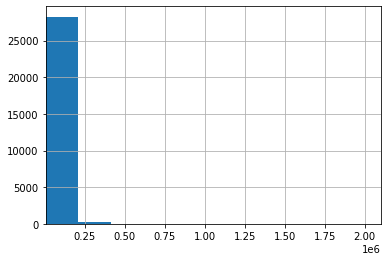

In [59]:
df["person_income"].hist()
plt.xlim(xmin=4000, xmax = 2100000)

According to the above graph, we can see that the histogram is right skewed. Most of the data lies in the income range of 4000-200,000

In [57]:
max(df["person_income"])

2039784

In [67]:
# 0-50,000       --> lower class
# 50,000-150,000 --> middle class
# >150,000       --> upper class

person_countsfor_income_less_than_50k = df[df["person_income"]<50000]["person_income"].value_counts().sum()
person_counts_for_income_between_50k_150k = df[(df["person_income"]>=50000) & (df["person_income"]<150000)]["person_income"].value_counts().sum()
person_counts_for_income_greater_than_150k = df[df["person_income"]>=150000].value_counts().sum()

<BarContainer object of 3 artists>

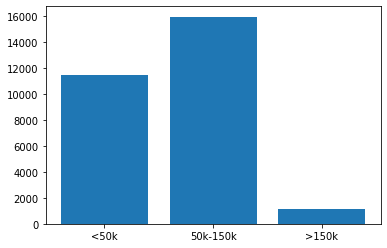

In [68]:
age_categories = {
    '<50k' : person_counts_for_income_less_than_50k,
    '50k-150k' : person_counts_for_income_between_50k_150k,
    '>150k' : person_counts_for_income_greater_than_150k
    
}
x = list(age_categories.keys())
y = list(age_categories.values())
plt.bar(x = x, height = y)

As we can see from tha above bar chart that people with mid level income (50k-150k) has the highest loan borrowing tendency followed by people with the least income level (<50k). In order to get a quantitative view, lets look at the pie chart below

[40.140402347024306, 55.81167924001117, 4.047918412964515]


([<matplotlib.patches.Wedge at 0x260f2666a00>,
 [Text(-1.0476512915315113, 0.3353010160323953, '<50k'),
  Text(0.9966661784717359, -0.4654637780650028, '50k-150k'),
  Text(0.13950990648327094, 1.0911173108300634, '>150k')])

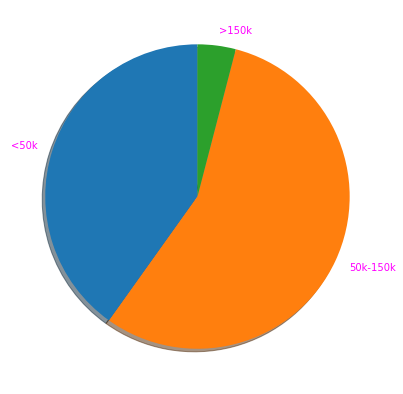

In [69]:
age_categories = {
    '<50k' : 100*person_counts_for_income_less_than_50k/df.shape[0],
    '50k-150k' : 100*person_counts_for_income_between_50k_150k/df.shape[0],
    '>150k' : 100*person_counts_for_income_greater_than_150k/df.shape[0]
    
}
print(list(age_categories.values()))
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(list(age_categories.values()),labels = list(age_categories.keys()),shadow = True,startangle = 90,textprops = dict(color ="magenta"))

We can clearly see from the above pie chart that majority of the loans are taken by the people belonging to the low and mid level income with highest being 50k-150k with a share of (55.8%) and secondly <50k with a share of (40.1%), whereas high income bracket people (>150k) has a minimum share of (4.04%)

In [70]:
person_countsfor_income_less_than_50k = df[df["person_income"]<50000]["person_income"].value_counts().sum()
person_counts_for_income_between_50k_150k = df[(df["person_income"]>=50000) & (df["person_income"]<150000)]["person_income"].value_counts().sum()
person_counts_for_income_greater_than_150k = df[df["person_income"]>=150000].value_counts().sum()

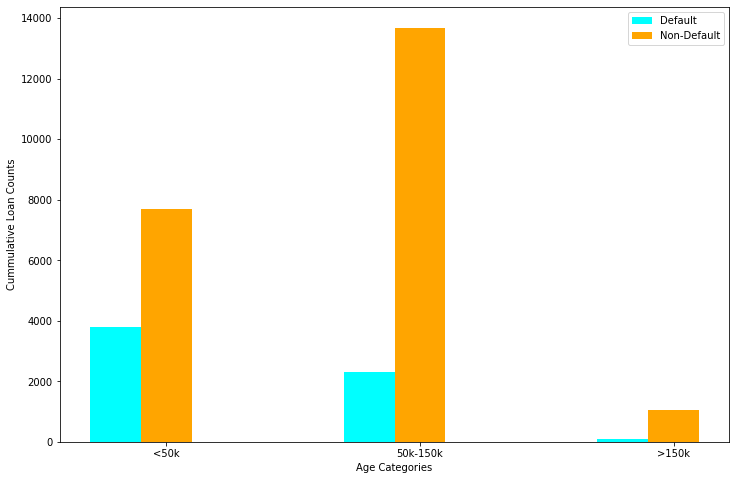

In [71]:
default = [df[df["person_income"]<50000]["loan_status"].value_counts()[1], 
           df[(df["person_income"]>=50000) & (df["person_income"]<150000)]["loan_status"].value_counts()[1],
           df[df["person_income"]>=150000]["loan_status"].value_counts()[1]]


non_default = [df[df["person_income"]<50000]["loan_status"].value_counts()[0],
              df[(df["person_income"]>=50000) & (df["person_income"]<150000)]["loan_status"].value_counts()[0],
              df[df["person_income"]>=150000]["loan_status"].value_counts()[0]]

x = np.arange(3)
plt.figure(figsize=(12,8))
plt.bar(x-0.2, height=default,width=0.2, color='cyan')
plt.bar(x, height=non_default,width=0.2, color='orange')
plt.xticks(x,['<50k','50k-150k','>150k'])
plt.xlabel("Age Categories")
plt.ylabel("Cummulative Loan Counts")
plt.legend(["Default", "Non-Default"])
plt.show()

dict_values([33.115809623248936, 14.34918648310388, 8.886971527178602])


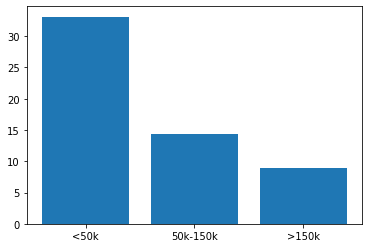

In [72]:
relative_default_less_than_50k = 100*default[0]/(default[0]+non_default[0])
relative_default_50k_150k = 100*default[1]/(default[1]+non_default[1])
relative_default_greater_than_150k = 100*default[2]/(default[2]+non_default[2])

dic = {
    '<50k' : relative_default_less_than_50k,
    '50k-150k' : relative_default_50k_150k,
    '>150k' : relative_default_greater_than_150k
    
}
x = list(dic.keys())
y = list(dic.values())
plt.bar(x = x, height = y)

print(dic.values())

As we can see clearly from the above bar chart that people belonging to low income category (<50k) have more chances of commiting default relative_default percentage (33.11%) followed by (50k-150k) with a relative default percentage of (14.4%).

Therefore we can say that 'person_income' also affects whether a person will be defaulter or not.

In [73]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28627,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28628,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28629,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28630,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
